In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/DataSet'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

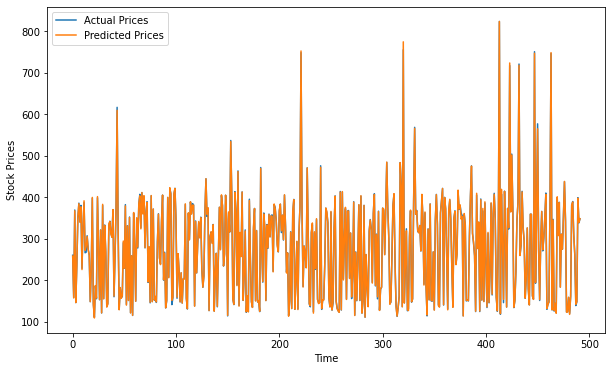

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('DataSet/ADANIPORTS.csv')

# Display the first few rows of the dataframe
print(df.head())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Check for any missing values
print(df.isnull().sum())

# Fill missing values (if any) with the previous row value (forward fill)
df.fillna(method='ffill', inplace=True)

# Feature engineering: Add some useful columns (e.g., daily return, moving averages)
df['Daily Return'] = df['Close'].pct_change()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Drop rows with NaN values (generated by rolling mean calculations)
df.dropna(inplace=True)

# Prepare features (X) and target (y)
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'Daily Return']
X = df[features]
y = df['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


In [3]:
!pip install keras



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install tensorflow


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

c:\Users\varun\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 0.0170 - val_loss: 4.5008e-04
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0017 - val_loss: 4.0844e-04
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0018 - val_loss: 3.2005e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0014 - val_loss: 4.1032e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0011 - val_loss: 2.6278e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0012 - val_loss: 3.8689e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0014 - val_loss: 2.3445e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 9.7661e-04 - val_loss: 3.1795e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 9.6997e-04 - val_loss: 5.1719e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 7.9215e-04 - val_loss: 2.3541e-04
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 9.5379e-04 - val_loss: 2.9

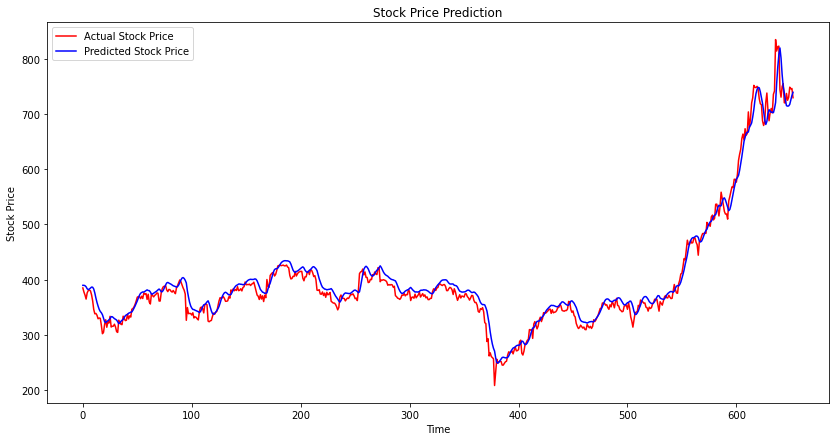

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

df = pd.read_csv('DataSet/ADANIPORTS.csv')

print(df.head())

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df = df.sort_values(by='Date')

data = df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

c:\Users\varun\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0149 - val_loss: 2.3497e-04
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0015 - val_loss: 2.3978e-04
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0012 - val_loss: 1.3994e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 8.4505e-04 - val_loss: 1.3859e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 8.2140e-04 - val_loss: 1.0663e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 7.4873e-04 - val_loss: 1.1184e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5.7952e-04 - val_loss: 1.5774e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 6.8355e-04 - val_loss: 2.6529e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.0707e-04 - val_loss: 1.3449e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.1997e-04 - val_loss: 9.7819e-05
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.4292e-04 - val_loss

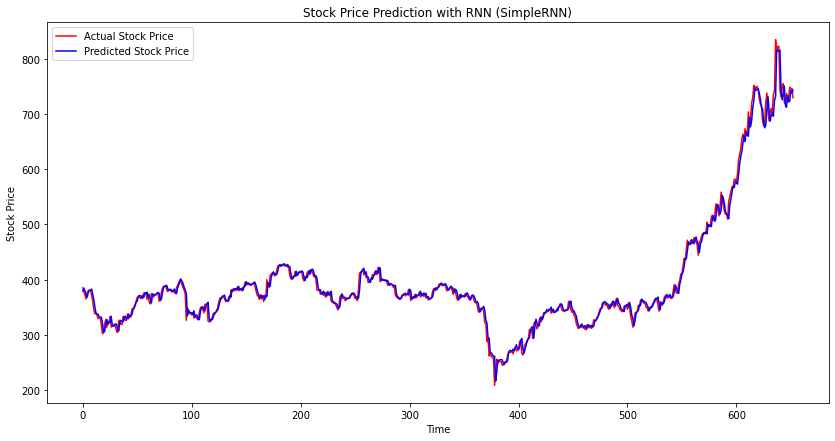

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('DataSet/ADANIPORTS.csv')

# Print first few rows to understand the structure
print(df.head())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Sort by date
df = df.sort_values(by='Date')

# Extract 'Close' prices and scale to range [0, 1]
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare sequences and targets for training
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X to be (samples, timesteps, features) for SimpleRNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the real stock prices for evaluation
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot actual vs. predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction with RNN (SimpleRNN)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64
Accuracy: 0.508130081300813
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       245
           1       0.51      0.45      0.48       247

    accuracy                           0.51       492
   macro avg       0.51      0.51      0.51       492
weighted avg       0.51      0.51      0.51       492



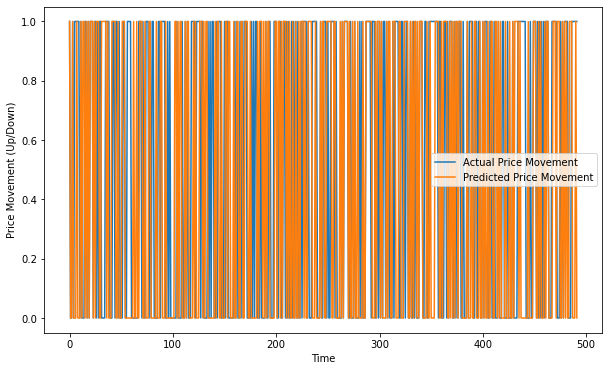

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('DataSet/ADANIPORTS.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Sort the dataframe by date
df = df.sort_values(by='Date')

# Check for any missing values
print(df.isnull().sum())

# Fill missing values (if any) with the previous row value (forward fill)
df.fillna(method='ffill', inplace=True)

# Feature engineering: Add some useful columns (e.g., daily return, moving averages)
df['Daily Return'] = df['Close'].pct_change()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Drop rows with NaN values (generated by rolling mean calculations)
df.dropna(inplace=True)

# Example: Create a binary target variable based on price movement
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Prepare features (X) and target (y) for classification
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'Daily Return']
X = df[features]
y = df['Price_Up']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Plotting actual vs predicted price movement (if desired)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price Movement')
plt.plot(y_pred, label='Predicted Price Movement')
plt.xlabel('Time')
plt.ylabel('Price Movement (Up/Down)')
plt.legend()
plt.show()


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

c:\Users\varun\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0060 - val_loss: 8.0379e-04
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - val_loss: 9.1593e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 4.1839e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 3.2589e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - val_loss: 3.9615e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - val_loss: 4.6722e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.4195e-04 - val_loss: 3.2782e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.5933e-04 - val_loss: 2.9964e-04
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - val_loss: 8.2608e-04
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s

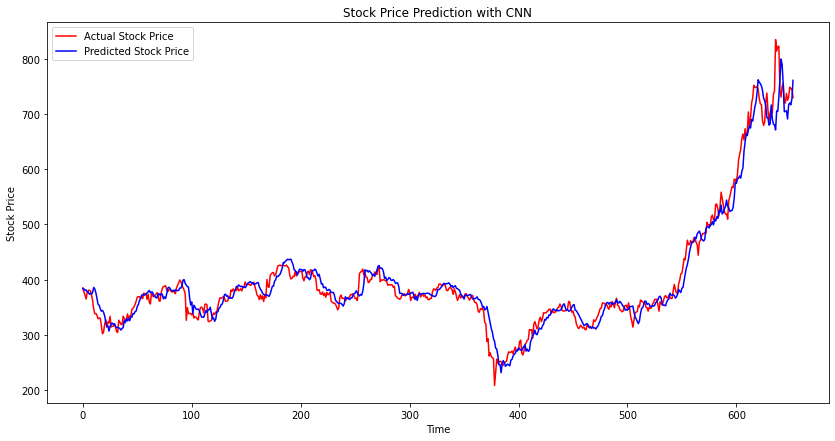

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('DataSet/ADANIPORTS.csv')

# Print first few rows to understand the structure
print(df.head())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Sort by date
df = df.sort_values(by='Date')

# Extract 'Close' prices and scale to range [0, 1]
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare sequences and targets for training
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X to be (samples, timesteps, features) for Conv1D
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the real stock prices for evaluation
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot actual vs. predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction with CNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

c:\Users\varun\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0110 - val_loss: 8.0509e-04
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 4.2604e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 8.1578e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 6.5692e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5129e-04 - val_loss: 5.4142e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6323e-04 - val_loss: 7.1394e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4258e-04 - val_loss: 4.2727e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4945e-04 - val_loss: 7.0829e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9233e-04 - val_loss: 0.0013
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━

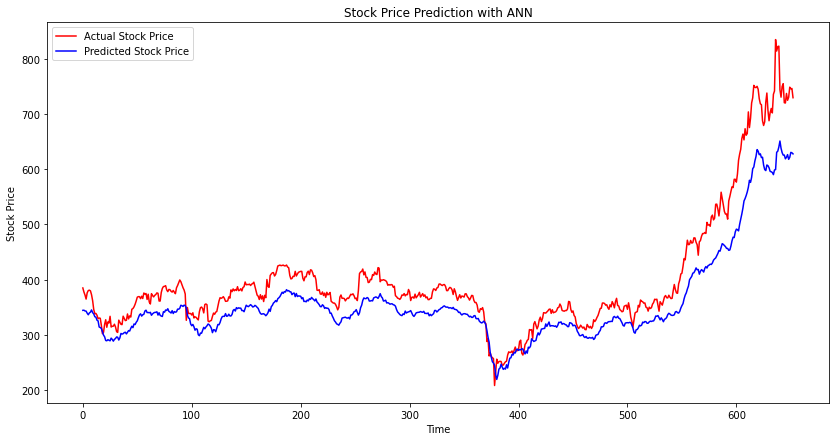

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('DataSet/ADANIPORTS.csv')

# Print first few rows to understand the structure
print(df.head())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Sort by date
df = df.sort_values(by='Date')

# Extract 'Close' prices and scale to range [0, 1]
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare sequences and targets for training
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Split data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the real stock prices for evaluation
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot actual vs. predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction with ANN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
